# Tarea 1 : Seminario de Estadística (EPG 3341) 
### Camilo González Rojas

## Carga de Librerías y Datos 

Cargamos las tres librerías permitidas para la tarea además se la librería `seaborn` para la pregunta 1.d)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Cargamos todas las bases de datos que será utilizadas en la tarea. 

In [2]:
df_features = pd.read_csv('Features.csv')
df_sales = pd.read_csv('sales.csv')
df_stores = pd.read_csv('stores.csv')
df_spiral = pd.read_table('spiral.txt',  names = ['eje_x', 'eje_y', 'cluster'])

Vemos si es que la data tiene valores `NaN`

In [3]:
null_features = df_features.isnull().mean() * 100
null_sales = df_sales.isnull().mean() * 100
null_stores = df_stores.isnull().mean() * 100
null_spiral = df_spiral.isnull().mean() * 100

In [4]:
null_features 

Store            0.000000
Date             0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       50.769231
MarkDown2       64.334554
MarkDown3       55.885226
MarkDown4       57.704518
MarkDown5       50.549451
CPI              7.142857
Unemployment     7.142857
IsHoliday        0.000000
dtype: float64

Vemos que tenemos valores no disponibles, de las variables que tienen `NaN` solo nos interesa $\texttt{CPI}$ y $\texttt{Unemployment}$, para esta tarea simplemente eliminaremos estos valores. 

In [5]:
df_features = df_features[df_features['CPI'].notna()]
df_features = df_features[df_features['Unemployment'].notna()]
null_features = df_features.isnull().mean() * 100
null_features 

Store            0.000000
Date             0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       54.648258
MarkDown2       67.902696
MarkDown3       59.447732
MarkDown4       60.894149
MarkDown5       54.437870
CPI              0.000000
Unemployment     0.000000
IsHoliday        0.000000
dtype: float64

In [6]:
null_sales

Store           0.0
Dept            0.0
Date            0.0
Weekly_Sales    0.0
IsHoliday       0.0
dtype: float64

In [7]:
null_stores

Store    0.0
Type     0.0
Size     0.0
dtype: float64

In [8]:
null_spiral

eje_x      0.0
eje_y      0.0
cluster    0.0
dtype: float64

Ahora que tenemos las bases sin `NaN` en las variables de interes, empezamos las preguntas.

## Pregunta 1.a)

Transformamos todas las unidades que se encuentran en sistema imperial a sistema métrico.

In [9]:
df_features.Temperature = df_features.Temperature.transform(       
    lambda x: (x-32)*(5/9)                                         # Transformación de Fahrenheit a Celcius
)                                

df_features.Fuel_Price = df_features.Fuel_Price.transform(
    lambda x: x/4.55                                               # Transformación de Galones a Litros
)          

df_stores.Size = df_stores.Size.transform(
    lambda x: x*0.3048                                             # Transformación de Pies a Metros
)                         

## Pregunta 1.b)

Comenzamos mostrando un data frame que contega las ventas totales y promedio por tienda y por semana.

In [10]:
prom_store_week = df_sales.groupby(['Store','Date']).agg({'Weekly_Sales': [sum, np.mean]}) 
prom_store_week

Weekly_Sales              
                          sum          mean
Store Date                                 
1     01/04/2011   1495064.75  21057.250000
      01/06/2012   1624477.58  22879.965915
      01/07/2011   1488538.09  21573.015797
      01/10/2010   1453329.50  19908.623288
      02/03/2012   1688420.76  23450.288333
...                       ...           ...
45    30/07/2010    716859.27  10542.048088
      30/09/2011    698986.34  10279.210882
      30/12/2011    869403.63  12785.347500
      31/08/2012    734297.87  10798.498088
      31/12/2010    679156.20  10136.659701

[6435 rows x 2 columns]

Utilizaremos un `groupby` para crear un data frame llamado $\texttt{holiday}$ que contiene las tiendas mostrando el promedio de los dias feriados y normales.

In [11]:
holiday = df_sales.groupby(['Store', 'IsHoliday']).agg({'Weekly_Sales': [np.mean]})
holiday.head(8)

Weekly_Sales
                         mean
Store IsHoliday              
1     False      21609.634733
      True       23039.386667
2     False      26753.864227
      True       28798.710526
3     False       6332.098604
      True        6916.446288
4     False      29032.260570
      True       30854.231417

Ahora filtraremos el data frame holiday por feriado y día normal para luego crear un data frame llamado $\texttt{tabla}$, este contiene 
las columnas de $\texttt{Store}$, $\texttt{Prom_Normal}$ y $\texttt{Prom_Holiday}$.

In [12]:
holiday = holiday.reset_index()
holiday0 = holiday[holiday['IsHoliday'] == 0]
holiday1 = holiday[holiday['IsHoliday'] == 1]

n = int((len(holiday.Store)/2)+1)
tabla = pd.DataFrame({
    'Store' : range(1,n),
    'Prom_Normal' : list(holiday0['Weekly_Sales']['mean']),
    'Prom_Holiday' : list(holiday1['Weekly_Sales']['mean'])
})

Finalmente usamos `assign` para crear una nueva columna $\texttt{Razón}$. Notemos que, $$ \texttt{Razón} = \frac{\texttt{Promedio  Feriado}}{\texttt{Promedio  Normal}}.$$

In [13]:
tabla = tabla.assign(Razon = lambda x: (x.Prom_Holiday / x.Prom_Normal))

Continuamos ordenamos tabla en orden ascendiente por la columna $\texttt{Razon}$, mostramos las diez primeras tiendas según el enunciado.

In [14]:
tabla = tabla.sort_values(['Razon'])
tabla.head(10)

,Store,Prom_Normal,Prom_Holiday,Razon
35,36,8597.374014,8412.829062,0.978535
43,44,6046.886331,5932.577174,0.981096
36,37,10306.767529,10170.842685,0.986812
37,38,7493.363637,7480.585843,0.998295
29,30,8763.636535,8772.275241,1.000986
42,43,13410.729834,13473.438093,1.004676
32,33,5723.280870,5796.788499,1.012844
41,42,11425.515827,11680.949753,1.022356
31,32,16318.545633,16789.178285,1.028840
39,40,13730.522084,14197.663028,1.034022


Finalmente solo cuatro tiendas venden menos en días feriados, las 10 primeras tiendas con la razón más baja son:

In [15]:
lista_tiendas = list(tabla['Store'])
lista_tiendas[0:10]

[36, 44, 37, 38, 30, 43, 33, 42, 32, 40]

## Pregunta 1.c)

Hacemos un `merge` de la base $\texttt{Sales}$ y $\texttt{Stores}$ para tener las ventas por tipo.

In [16]:
sale_type = df_sales.merge(
    df_stores, 
    how = 'outer', 
    left_on = ['Store'],
    right_on = ['Store'])

sale_type = sale_type .groupby(['Type', 'Date']).agg({'Weekly_Sales': [np.mean]}).reset_index()

Vemos todos los tipos de tienda.

In [17]:
np.unique(list(sale_type.Type))

array(['A', 'B', 'C'], dtype='<U1')

Aquí convertimos el formato de la fecha y además obtenemos un data frame por tienda.

In [18]:
sale_type.Date = pd.to_datetime(sale_type.Date)
sale_A = sale_type[sale_type['Type'] == 'A'].sort_values('Date')
sale_B = sale_type[sale_type['Type'] == 'B'].sort_values('Date')
sale_C = sale_type[sale_type['Type'] == 'C'].sort_values('Date')

Definimos los colores a usar (RGB)

In [19]:
sky = (0.5294117647058824, 0.807843137254902, 0.93, 1)
aqua = (0.4980392156862745, 1.0, 0.8313725490196079, 1)
org = (1, 0.8, 0, 1)

Finalmente vemos todos los gráficos y luego en la misma ventana.

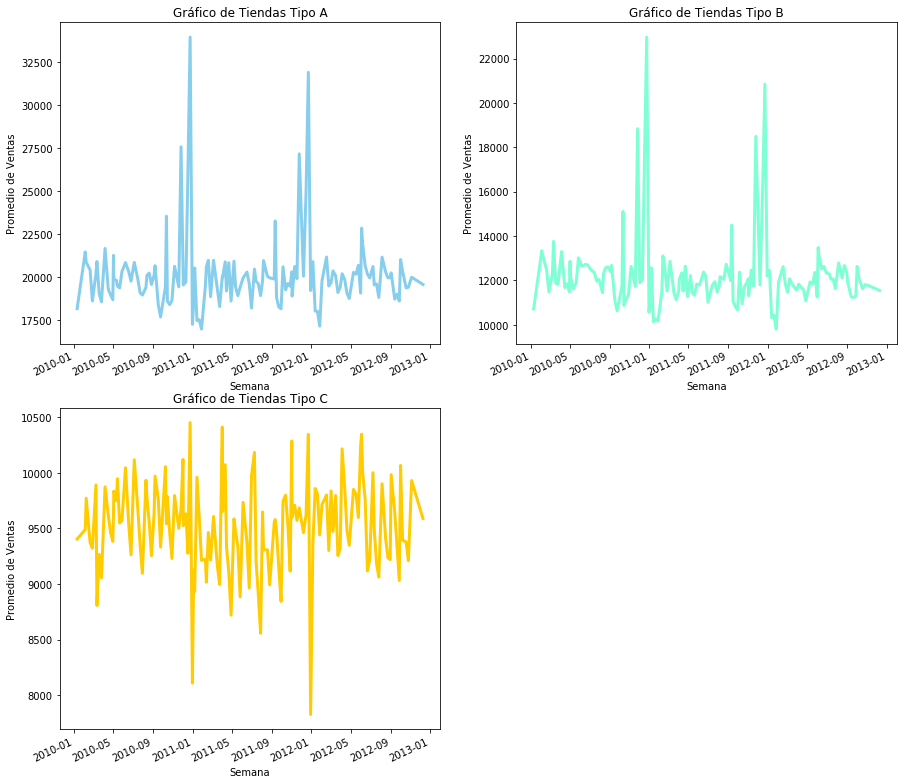

In [20]:
plt.figure(figsize = (15, 13))
plt.subplot(221)
plt.plot(sale_A.Date, sale_A.Weekly_Sales, color = sky, linewidth = 3)
plt.title('Gráfico de Tiendas Tipo A')
plt.xlabel('Semana')
plt.ylabel('Promedio de Ventas')
plt.setp(plt.xticks()[1], rotation=25, ha='right')

plt.subplot(222)
plt.plot(sale_B.Date, sale_B.Weekly_Sales, color = aqua, linewidth = 3)
plt.title('Gráfico de Tiendas Tipo B')
plt.xlabel('Semana')
plt.ylabel('Promedio de Ventas')
plt.setp(plt.xticks()[1], rotation=25, ha='right')

plt.subplot(223)
plt.plot(sale_C.Date, sale_C.Weekly_Sales, color = org, linewidth = 3)
plt.title('Gráfico de Tiendas Tipo C')
plt.xlabel('Semana')
plt.ylabel('Promedio de Ventas')
plt.setp(plt.xticks()[1], rotation=25, ha='right')

plt.show()

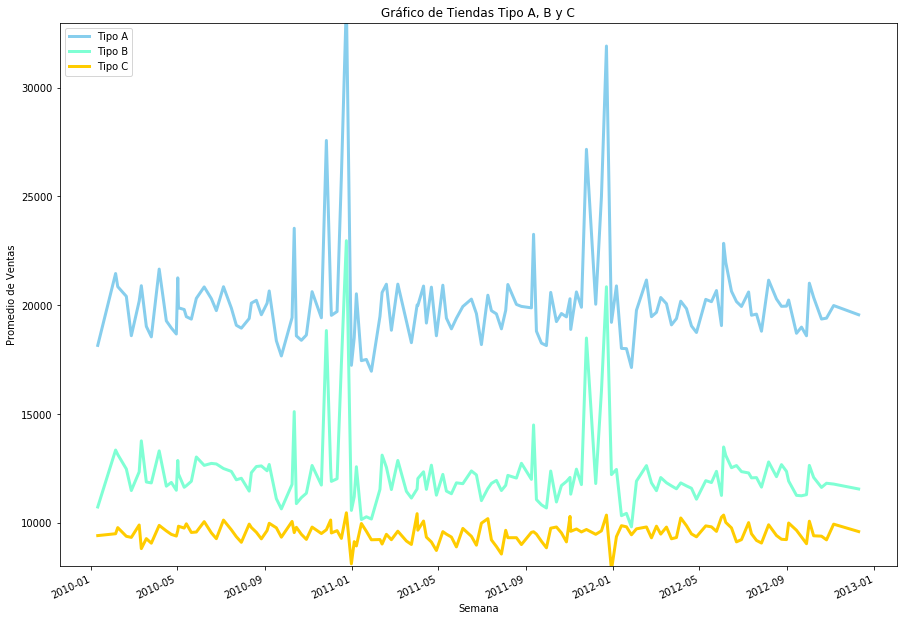

In [21]:
plt.figure(figsize = (15, 10))

plt.plot(sale_A.Date, sale_A.Weekly_Sales, color = sky, linewidth = 3, label = 'Tipo A')
plt.plot(sale_B.Date, sale_B.Weekly_Sales, color = aqua, linewidth = 3, label = 'Tipo B')
plt.plot(sale_C.Date, sale_C.Weekly_Sales, color = org, linewidth = 3, label = 'Tipo C')
plt.title('Gráfico de Tiendas Tipo A, B y C')
plt.xlabel('Semana')
plt.ylabel('Promedio de Ventas')
plt.setp(plt.xticks()[1], rotation=25, ha='right')
axes = plt.gca()
axes.set_ylim([8000,33000])
plt.legend(loc="upper left")
plt.show()

## Pregunta 1.d)

Nuevamente hacemos un `merge`, esta vez con la base *features* y *sales*.

In [22]:
df_sales_features = df_sales.merge(
    df_features, 
    how = 'inner', 
    left_on = ['Store', 'Date', 'IsHoliday'],
    right_on = ['Store', 'Date', 'IsHoliday'])

Ahora hacemos un `groupby` para tener las ventas totales.

In [23]:
df_sales_features = df_sales_features.groupby(['Store', 'Date'])
df_sales_features = df_sales_features.agg({'Weekly_Sales': [sum], 'Temperature': [np.mean], 'CPI': [np.mean], 'Unemployment': [np.mean]})
df_sales_features = df_sales_features.reset_index()

Hacemos una lista que contiene la correlación de cada tienda con el índice de precio del consumidor (CPI), Temperatura, Desempleo y precio de los combustibles.
Luego la convertimos en un data frame.

In [24]:
lista = []
for i in range(1, n):
    aux = df_sales_features[df_sales_features['Store'] == i].corr().iloc[[1], [2, 3, 4]]
    lista.append(aux)
    
df_corr = pd.concat(lista).reset_index()

df_corr = pd.DataFrame({
    'Tienda': range(1,n),
    'Desempleo': df_corr['Unemployment']['mean'],
    'Temperatura': df_corr['Temperature']['mean'],
    'CPI': df_corr['CPI']['mean']
})

df_corr = df_corr.set_index('Tienda')

Mostramos las primeras 10 tiendas.

In [25]:
df_corr.head(10)

,Desempleo,Temperatura,CPI
Tienda,,,
1,-0.097955,-0.222701,0.225408
2,0.066325,-0.297673,-0.062431
3,-0.230413,-0.377524,0.317250
4,-0.337015,-0.225583,0.351157
5,-0.207043,-0.175517,0.308261
6,0.044251,-0.084863,-0.011357
7,-0.165382,0.015077,0.289044
8,-0.052580,-0.312324,0.120255
9,-0.191534,-0.208343,0.294805


Aquí usaremos la librería `seaborn` cargada al comienzo, mostramos un mapa de calor. 

[Text(105.0, 0.5, ''),
 Text(0.5, 105.0, 'Tienda según un Código'),
 Text(0.5, 1, 'Gráfico de Correlaciones')]

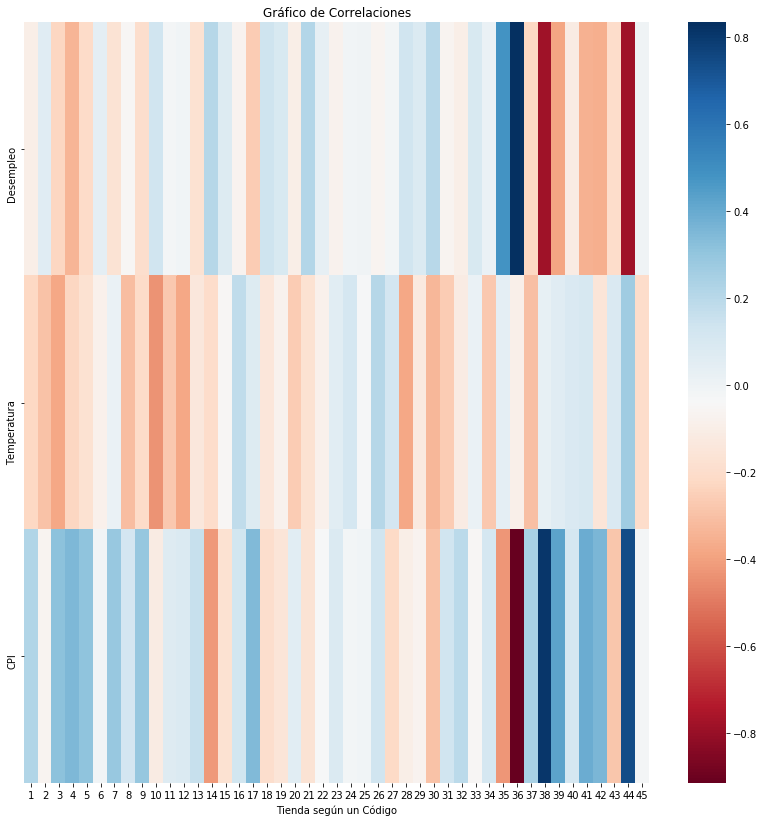

In [26]:
heatmap1_data = df_corr.T
plt.figure(figsize = (14, 14))
sns.heatmap(heatmap1_data, cmap = "RdBu").set(xlabel='Tienda según un Código', ylabel='', title = 'Gráfico de Correlaciones')

## Pregunta 1.e)

A mi parecer el enunciado es un poco ambiguo, lo que harémos es cortar las últimas doce semanas de la base, con la base resultante harémos un pronóstico con media móvil de ventana 12 con las últimas doce semanas de esa nueva base. Finalmente se mostrará nuestro pronóstico y los valores reales de las últimas 12 semanas de la base original. Consideramos que algunas observaciones cortan antes las semanas y algunas después, consideremos simplemente las últimas doce, es decir algunas predicen semanas más a futuro que otras.

In [27]:
df_sales_forecast = df_sales.groupby(['Store', 'Dept', 'Date']).agg({'Weekly_Sales' : [sum]}).reset_index()
df_sales_forecast = pd.DataFrame({ 
    'Store': df_sales_forecast.Store,
    'Dept': df_sales_forecast.Dept,
    'Date': df_sales_forecast.Date,
    'Weekly_Sales': df_sales_forecast.Weekly_Sales['sum']
})
df_sales_forecast.Date = pd.to_datetime(df_sales_forecast.Date)

Para hacer esta pregunta tenemos que saber que el código de tienda va de 1 a 45 pero los departamentos no son un rango seguido, llamaremos a la lista de valores de los departamentos como `list_dept`.

In [28]:
list_dept = np.unique(list(df_sales_forecast.Dept))

Veamos la lista de departamentos.

In [29]:
list_dept

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       54, 55, 56, 58, 59, 60, 65, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82,
       83, 85, 87, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

Aquí hacemos una lista donde en la primera posición contiene un identificador $i,j$ donde $i$ es el número del código de tienda y el $j$ el número de departamento. En la segunda posición estan los valores reales y en la tercera nuestro pronóstico. 
(Nota: Se demora un poco por los `for` pero lo hace, se espera en las próximas tareas mejorar la eficiencia)

In [30]:
tienda = []
for i in range(1,46):
    for j in list_dept:
        forecast = []
        aux = df_sales_forecast[df_sales_forecast['Store'] == i]
        aux = aux[aux['Dept'] == j].iloc[:, [2,3]]
        aux = aux.sort_values('Date')
        test = aux[-12:]
        aux = aux[-24:-12]
        aux1 = aux.Weekly_Sales
        for k in range(1,13):
            aux2 = aux1.rolling(12).mean()[-1:]
            aux1 = pd.concat([aux1, aux2])
        forecast = aux1[-12:]
        identificador = [[i,j], test, forecast]
        tienda.append(identificador)
        

A continuación veremos un ejemplo de la tienda 1 y el departamento 8.

In [31]:
tienda[7][0]  # Identificador

[1, 8]

In [32]:
tienda[7][1] # Test

,Date,Weekly_Sales
1111,2012-08-24,33855.28
1142,2012-08-31,37666.92
1038,2012-09-03,36553.82
1065,2012-09-14,37346.83
1098,2012-09-21,36404.63
1131,2012-09-28,37254.84
1043,2012-10-02,38317.89
1045,2012-10-08,37269.92
1089,2012-10-19,38668.75
1122,2012-10-26,39255.35


In [33]:
tienda[7][2]  # Pronostico

1078    38320.845833
1078    38447.832986
1078    38158.689068
1078    37878.190657
1078    37854.393212
1078    37867.769313
1078    37886.130089
1078    37821.123430
1078    37962.049549
1078    37975.777845
1078    38058.600999
1078    37877.131915
Name: Weekly_Sales, dtype: float64

## Pregunta 1.f)

Hacemo el calculo del *MAPE* y lo agregamos a la lista de la pregunta anterior. Si tenemos ventas 0 en alguna semana nos dará infinito, por esta tarea se eliminará simplemente esos casos. 

In [34]:
largo = len(tienda)
for i in range(0,largo):
    y = np.array(tienda[i][1].Weekly_Sales)
    y_gorro = np.array(tienda[i][2])
    if (len(y) == 12 and all(y) > 0 and len(y_gorro) == 12):
        MAPE = (1/12) * np.mean(np.abs((y - y_gorro)/y))
    else: MAPE = 0   
    tienda[i].append(MAPE) 

In [35]:
lista_MAPE = []
len_tienda = len(tienda)
for i in range(0, len_tienda):
    aux1 = tienda[i][0]
    aux2 = tienda[i][3]
    aux3 = [aux1, aux2]
    lista_MAPE.append(aux3)
df_MAPE = pd.DataFrame(lista_MAPE, columns = ['Idenificador', 'MAPE'])
df_MAPE = df_MAPE.replace([np.inf, -np.inf], 0)

Mostramos las tiendas-departamentos con MAPE más bajo, es decir, los que tienen mejor ajuste.

In [36]:
df_MAPE = df_MAPE[df_MAPE['MAPE'] > 0]
df_MAPE.sort_values('MAPE', ascending = True)[0:10]

,Idenificador,MAPE
2425,"[30, 95]",0.001473
250,"[4, 8]",0.001639
3166,"[40, 8]",0.001748
574,"[8, 8]",0.001750
3068,"[38, 90]",0.001803
1465,"[19, 8]",0.001849
736,"[10, 8]",0.001875
2988,"[37, 91]",0.001985
395,"[5, 90]",0.002032
93,"[2, 13]",0.002112


Mostramos las tiendas-departamentos con MAPE más alto.

In [37]:
df_MAPE.sort_values('MAPE', ascending = False)[0:10]

,Idenificador,MAPE
988,"[13, 18]",572.769181
80,"[1, 99]",525.218794
2753,"[34, 99]",470.003899
647,"[8, 99]",438.680904
1555,"[20, 18]",412.631135
1474,"[19, 18]",379.562440
1943,"[24, 99]",358.754633
97,"[2, 18]",312.042856
2527,"[32, 18]",291.504676
340,"[5, 18]",223.530233


## Pregunta 1.g)

En la pregunta anterior vimos que la tienda 30 con el departamento 95 es el que tiene el mejor MAPE, veamos el gráfico.

Text(0, 0.5, 'Ventas')

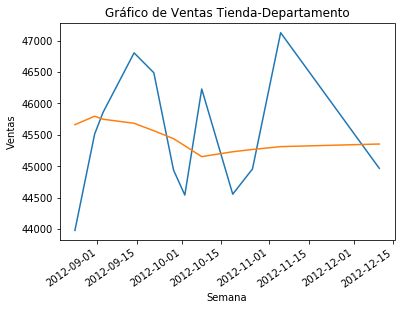

In [38]:
reales = tienda[2425][1]
pronostico = tienda[2425][2]
plt.setp(plt.xticks()[1], rotation=35, ha='right')
plt.plot(reales.Date, reales.Weekly_Sales)
plt.plot(reales.Date, pronostico)
plt.title('Gráfico de Ventas Tienda-Departamento')
plt.xlabel('Semana')
plt.ylabel('Ventas')

## Pregunta 2

Harémos desde la **a)** hasta la **d)** en una sola definición de `clase`.

Creamos la clase pedida. Commo nota, hice el algoritmo fit varias veces de distintas formas, el que se presenta es el que menos tiempo demora pero tiene más lineas de código. 

In [39]:
# PREGUNTA 1.A)

class ClusterDatos:                  
    def __init__(self, epsilon, N):
        self.epsilon = epsilon
        self.N = N
        
# PREGUNTA 1.B)        
        
    def fit(self, dataframe):       
        n = len(dataframe)
        datos = []
        for i in range(0, n):
            pto_x = np.array(dataframe.iloc[[i],[0]])[0][0]    #Transformación de data en lista de pares ordenados
            pto_y = np.array(dataframe.iloc[[i],[1]])[0][0]
            datos.append(np.array([pto_x, pto_y]))
        
        def cercanos(pos):
            distancias = []
            for i in range(0, n): 
                dist = np.sqrt(sum((datos[pos]-datos[i])**2))  # Función que obtiene todos los puntos cercanos a distancia menor que epsilon
                if (dist < self.epsilon or dist == 0):
                    distancias.append(i)
                else: None
            return distancias
        
        def clus(listita):
            lista_cercanos = []
            for i in listita:
                lista_cercanos = np.union1d(cercanos(i), lista_cercanos)  #Función que de forma recursiva utiliza la función cercanos. 
                inter =  np.intersect1d(cercanos(i), lista_cercanos)
                for j in inter:
                    j= int(j)
                    if j not in listita:
                        listita.append(j)
                
            return lista_cercanos
        
        cluster = []
        outliers = []
        lista_random = list(range(0,n))
        for z in range(0,n):
            i = np.random.choice(lista_random)           # Elección de puntos aleatorios
            lista_random.remove(i)
            if (len(cluster) != 0):
                aux = []
                for j in range(0,len(cluster)):        # Se crean los cluster y se filtran con los que tienen N puntos.
                    if i in cluster[j]:
                        aux.append(1)
                    else: aux.append(0) 
                if (sum(aux) == 0 ):
                    aux10 = np.ndarray.tolist(clus(cercanos(i)))
                    if (len(aux10) > self.N):
                        cluster.append(aux10)
                    else: outliers.append(i)
                        
                else: None
            
            else: 
                aux20 = np.ndarray.tolist(clus(cercanos(i)))
                if (len(aux20) > self.N):
                        cluster.append(aux20)
                else: outliers.append(i)
            
        return  [cluster,outliers]
        
        
        
# PREGUNTA 1.C)

    def plot(self, dataframe):             
        lista = self.fit(dataframe)
        respuesta = input('¿Quiere guardar el gráfico?  responde y/n')
        for i in range(0,len(lista[0])): 
            plt.plot(dataframe.iloc[lista[0][i]].eje_x, dataframe.iloc[lista[0][i]].eje_y, marker='o', linestyle='')
            
        plt.plot(dataframe.iloc[lista[1]].eje_x, dataframe.iloc[lista[1]].eje_y, marker='o', linestyle='')  
        if (respuesta == 'y'):
            ruta = input('ingrese la ruta (la ruta tiene que terminar en \ si es Window y / si es macOS):')
            nombre = input('ingrese el nombre del archivo:')
            plt.savefig(ruta + nombre + '.png')
        else: None
        
        
# PREGUNTA 1.D)

    def predict(self, old_data, new_data):     # Pregunta 1.d)
        data_vieja = self.fit(old_data)
        data_nueva = []         
        for i in range(0, len(new_data)):
            pto_x_n = np.array(new_data.iloc[[i],[0]])[0][0]
            pto_y_n = np.array(new_data.iloc[[i],[1]])[0][0]
            data_nueva.append(np.array([pto_x_n, pto_y_n]))
        correspondencia = []
        pos_outlier = list(range(0,len(new_data)))
                             
        for i in range(0, len(data_vieja[0])):
            for j in range(0, len(data_vieja[0][i])):
                indice = data_vieja[0][i][j]
                pto_x_v = np.array(old_data.iloc[[indice],[0]])[0][0]
                pto_y_v = np.array(old_data.iloc[[indice],[1]])[0][0]
                pto_v = np.array([pto_x_v, pto_y_v])
                for k in pos_outlier:
                    dist_n= np.sqrt(sum(( pto_v - data_nueva[k])**2))
                    if (dist_n < self.epsilon):
                        correspondencia.append(['Posición nueva obs. :', k, 'Cluster:', i+1])
                        pos_outlier.remove(k)
        
        no_clust = ['Posición de observación Outlier:', pos_outlier]
        retorno = [correspondencia, no_clust]
        return retorno            

## Pregunta 2.e)

Ahora para mostrar la clase usaremos la base entregada. Partimos viendo el método fit. Este entrega una lista donde el primer elemento contiene una lista de las posiciones de cada cluster, la seguda posición contiene las observaciones outliers. Básicamente el fit trabaja por puntos encuentrando todos los puntos cercanos a distancia $\epsilon$ y los cercanos de los cercanos para hacer un cluster, se considera cluster si tiene al menos $N$ puntos, luego toma otro punto que no este en el primer cluster y repite el procso. Probaberomos con $ \epsilon = 0,1,3$ y $ N = 0,2,3$. Por temas de espacio y procesamiento mostraremos la cantidad de cluster y cantidad de outliers solamente.

In [48]:
clase_prueba = ClusterDatos(0,0)
test = clase_prueba.fit(df_spiral)
print('Número de Clusters:', len(test[0]), 'Outliers:', len(test[1]))

Número de Clusters: 312 Outliers: 0


Aquí como el radio es 0, pero $N$ también tenemos que cada punto es un cluster.

In [40]:
clase_prueba = ClusterDatos(0,1)
test = clase_prueba.fit(df_spiral)
print('Número de Clusters:', len(test[0]), 'Outliers:', len(test[1]))

Número de Clusters: 0 Outliers: 312


Como el radio es cero era de esperar que todo fuera outlier. Veamos con radio 1.

In [41]:
clase_prueba = ClusterDatos(1,2)
test = clase_prueba.fit(df_spiral)
print('Número de Clusters:', len(test[0]), 'Outliers:', len(test[1]))

Número de Clusters: 6 Outliers: 8


Para probar el predict usaremos una base definida por nosotros que 
contenga puntos que corresponden a un cluster y otros puntos lejanos que quedarían outliers (fila 3,4,5).

In [42]:
clase_prueba = ClusterDatos(3,3)
test = clase_prueba.fit(df_spiral)
print('Número de Clusters:', len(test[0]), 'Outliers:', len(test[1]))

Número de Clusters: 3 Outliers: 0


Verifiquemos el método plot que gráfica la data con sus respectivos cluster. Básicamente hace un plot utilizando el método fit y pregunta si se desea guardar. Probamos distintos valores.

¿Quiere guardar el gráfico?  responde y/n n


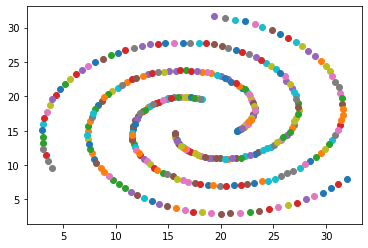

In [49]:
clase_prueba = ClusterDatos(0,0)
clase_prueba.plot(df_spiral)

¿Quiere guardar el gráfico?  responde y/n m


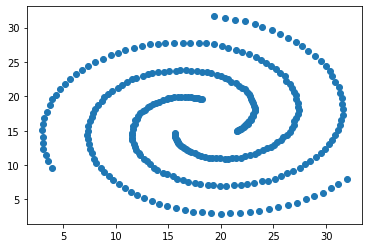

In [43]:
clase_prueba = ClusterDatos(0,3)
clase_prueba.plot(df_spiral)

¿Quiere guardar el gráfico?  responde y/n mh


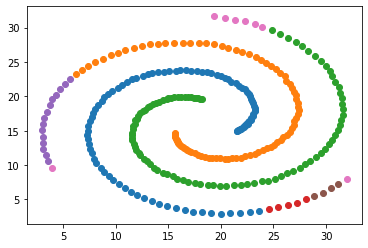

In [44]:
clase_prueba = ClusterDatos(1,2)
clase_prueba.plot(df_spiral) 

¿Quiere guardar el gráfico?  responde y/n m


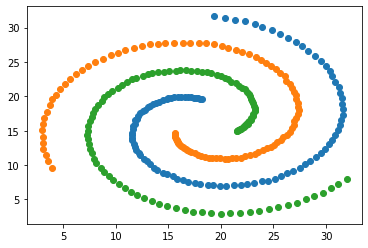

In [45]:
clase_prueba = ClusterDatos(3,3)
clase_prueba.plot(df_spiral)

Para el predict definiremos una data donde algunos puntos son demasiado grandes, por lo que siempre quedará outlier. Los demás puntos son copiados de `df_spriral`

In [46]:
nueva_data = pd.DataFrame({'col 1' : [31.95, 31.15, 30.45, 213213, 213213, 3212321, 15.65, 15.65], 
                      'col 2' : [7.95, 7.30, 6.65, 21321, 12321321, 8765, 14.60, 14.50]})

Aquí ingresamos la data vieja y la data nueva. Notemos que los cluster van variando si corremos el siguiente código varias veces, esto es por lo aleatorio de elegir los puntos, sin embargo solo cambia la etiqueta del cluster (1,2,3).

In [47]:
clase_prueba = ClusterDatos(3,3)
clase_prueba.predict(df_spiral, nueva_data)

[[['Posición nueva obs. :', 7, 'Cluster:', 2],
  ['Posición nueva obs. :', 6, 'Cluster:', 2],
  ['Posición nueva obs. :', 0, 'Cluster:', 3],
  ['Posición nueva obs. :', 2, 'Cluster:', 3],
  ['Posición nueva obs. :', 1, 'Cluster:', 3]],
 ['Posición de observación Outlier:', [3, 4, 5]]]